In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "./10-Monkeys/training/training"
valid_dir = "./10-Monkeys/validation/validation"
label_dir = "./10-Monkeys/monkey_labels.txt"

print(os.listdir(train_dir))

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [3]:
pd.read_csv(label_dir)

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    # rescale:对图片的每个像素值均乘上这个放缩因子,这个操作在所有其它变换操作之前执行,
    #         直接输入原图的像素值可能会落入激活函数的“死亡区”，
    #         因此设置放缩因子为1/255，把像素值放缩到0和1之间有利于模型的收敛，避免神经元“死亡”
    rescale = 1./255,
    
    # rotation_range：是用户指定旋转角度范围，其参数只需指定一个整数即可，
    #                 但并不是固定以这个角度进行旋转，而是在 [0, 指定角度] 范围内进行随机角度旋转
    rotation_range = 40,
    
    # width_shift_range：分别是水平位置评议和上下位置平移，其参数可以是[0, 1]的浮点数，也可以大于1，
    #                    其最大平移距离为图片长或宽的尺寸乘以参数，同样平移距离并不固定为最大平移距离，
    #                    平移距离在 [0, 最大平移距离] 区间内
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    
    # shear_range: 就是错切变换，效果就是让所有点的x坐标(或者y坐标)保持不变，而对应的y坐标(或者x坐标)则按比例发生平移，
    #              且平移的大小和该点到x轴(或y轴)的垂直距离成正比
    shear_range = 0.2,
    
    # zoom_range:可以让图片在长或宽的方向进行放大，可以理解为某方向的resize，因此这个参数可以是一个数或者是一个list。
    #            当给出一个数时，图片同时在长宽两个方向进行同等程度的放缩操作；
    #            当给出一个list时，则代表[width_zoom_range, height_zoom_range]，
    #            即分别对长宽进行不同程度的放缩。
    #            而参数大于0小于1时，执行的是放大操作，当参数大于1时，执行的是缩小操作。
    zoom_range = 0.2,
    
    # horizontal_flip: 作用是随机对图片执行水平翻转操作，意味着不一定对所有图片都会执行水平翻转，
    #                  每次生成均是随机选取图片进行翻转
    horizontal_flip = True,
    
    # fill_mode:填充模式，如前面提到，当对图片进行平移、放缩、错切等操作时，图片中会出现一些缺失的地方，
    #           那这些缺失的地方该用什么方式补全呢？就由fill_mode中的参数确定，
    #           包括：“constant”、“nearest”（默认）、“reflect”和“wrap”。
    fill_mode = 'nearest'
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    # train_dir:文件路劲
    train_dir,
    
    # target_size：统一图片大小
    target_size=(128, 128),
    
    # color_mode："grayscale", "rbg" 之一。默认："rgb"。图像是否转换为 1 个或 3 个颜色通道
    color_mode='rgb',
    
    # class_mode："categorical", "binary", "sparse", "input", "other" or None 之一。 
    #             默认："categorical"。决定返回标签数组的类型：
    #             "categorical" 将是 2D one-hot 编码标签
    class_mode='categorical',
    batch_size=36,
    shuffle=True,
    seed=7,)

Found 1098 images belonging to 10 classes.


In [6]:
for _ in np.arange(1):
    x_data, y_data = train_generator.next()
    print(np.argwhere(y_data[0]==1)[0][0])

8


In [12]:
# 显示图片
def show_images(n_row, n_col, x_data, y_data, class_names):
    assert len(x_data) == len(y_data), "the length must be the same"
    fig, axes = plt.subplots(n_row, n_col, figsize=(10, 10))
    for i in range(n_row):
        for j in range(n_col):
            index = i*n_col + j
            axes[i, j].imshow(x_data[index], cmap="binary", interpolation="nearest")
            axes[i, j].set_title(class_names[np.argwhere(y_data[index]==1)[0][0]])
    
    plt.show()

In [13]:
class_names=["mantled_howler","patas_monkey","bald_uakari","japanese_macaque","pygmy_marmoset",
             "white_headed_capuchin","silvery_marmoset","common_squirrel_monkey","black_headed_night_monkey","nilgiri_langur"]

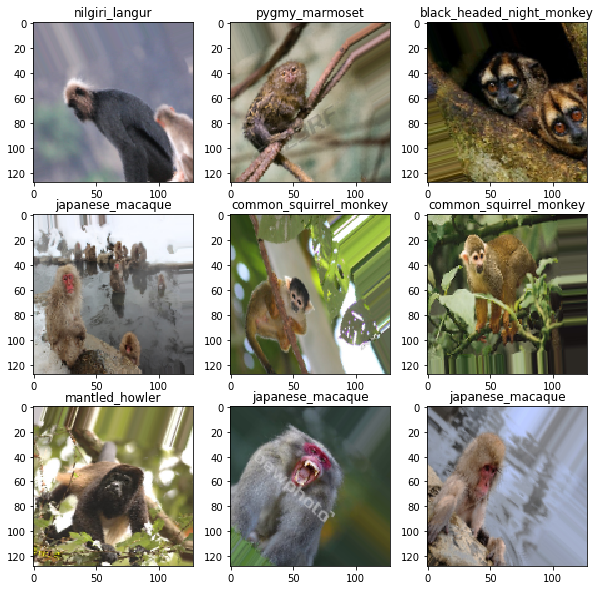

In [14]:
for _ in np.arange(1):
    x_data, y_data = train_generator.next()
    show_images(3, 3, x_data[:9], y_data[:9], class_names)

In [12]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,)
valid_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=36,
    shuffle=True,
    seed=7,)

Found 272 images belonging to 10 classes.


In [13]:
train_num = train_generator.samples
valid_num = valid_generator.samples

print(train_num, valid_num)

1098 272


In [14]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", input_shape=[128, 128, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [16]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
# loss损失函数：回归问题mean_squared_error，
#               分类问题categorical_crossentropy（label为one-hot形式），sparse_categorical_crossentropy
# optimizer优化器：SGD(SGD 虽然能达到极小值，但是比其它算法用的时间长，而且可能会被困在鞍点)，
#                  ADAM(实践表明，Adam 比其他适应性学习方法效果要好。)
# metrics评估标准：可指定多个
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
history = model.fit_generator(train_generator, 
                              validation_data=valid_generator, 
                              epochs=5, 
                              callbacks=callbacks)

# 1098/32 = 35

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
31/31 [==============================] - 69s 2s/step - loss: 2.2640 - accuracy: 0.1284 - val_loss: 2.1519 - val_accuracy: 0.2096
Epoch 2/10
31/31 [==============================] - 71s 2s/step - loss: 2.1443 - accuracy: 0.2040 - val_loss: 2.0251 - val_accuracy: 0.2537
Epoch 3/10
31/31 [==============================] - 68s 2s/step - loss: 1.9583 - accuracy: 0.2659 - val_loss: 1.8860 - val_accuracy: 0.3088
Epoch 4/10
31/31 [==============================] - 69s 2s/step - loss: 1.8521 - accuracy: 0.2969 - val_loss: 1.7479 - val_accuracy: 0.3603
Epoch 5/10
31/31 [==============================] - 69s 2s/step - loss: 1.8041 - accuracy: 0.3188 - val_loss: 1.8413 - val_accuracy: 0.2978
Epoch 6/10
31/31 [==============================] - 70s 2s/step - loss: 1.7962 - accuracy: 0.3169 - val_loss: 1.6946 - val_accuracy: 0.3603
Epoch 7/10
31/31 [==============================] - 67s 2s/step - loss: 1.6715 - acc

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


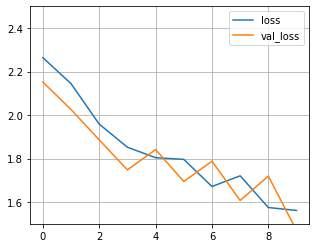

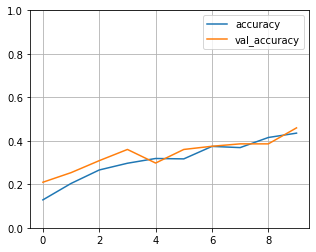

In [18]:
def plt_learning_curve(history, label, minY, maxY):
    data = {}
    data[label] = history[label]
    data["val_"+label] = history["val_"+label]
    pd.DataFrame(data).plot(figsize=(5,4))
    plt.grid(True)
    plt.ylim(minY, maxY)
    plt.show()
    
plt_learning_curve(history.history, "loss", 1.5, 2.5)
plt_learning_curve(history.history, "accuracy", 0, 1)